# Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Read DataFrame

In [2]:
df = pd.read_csv("processed_data.csv")
df.head(3)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,popularity,song_name,artist_name,genius_id,lyric,tags,tier,genius_url,released_year
0,0.507,0.394,6,-7.188,0,0.0350,0.5080,0.000,0.0825,0.164,...,4,85,Shot Glass of Tears,Jung Kook,9626003,"Tell me, am I ever gonna feel again? Tell me,...",pop,C,https://genius.com/Jung-kook-shot-glass-of-tea...,2023.0
1,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000,0.1060,0.952,...,4,81,Sucker,Jonas Brothers,4350998,We go together Better than birds of a feather...,pop,D,https://genius.com/Jonas-brothers-sucker-lyrics,2019.0
2,0.759,0.561,0,-5.643,0,0.1310,0.8030,0.121,0.1010,0.491,...,4,82,VISTA AL MAR,Quevedo,8357473,BlueFire Rápido llega' y rápido te vas (Vas) ...,pop,E,https://genius.com/Quevedo-vista-al-mar-lyrics,2022.0


## Data normalization

In [3]:
scaler = MinMaxScaler()

In [4]:
df_normalized = df.copy()
df_normalized.iloc[:, :-12] = pd.DataFrame(scaler.fit_transform(df_normalized.iloc[:, :-12]), columns=df_normalized.iloc[:, :-12].columns)

In [5]:
df_normalized

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,popularity,song_name,artist_name,genius_id,lyric,tags,tier,genius_url,released_year
0,0.435897,0.387650,0.545455,0.752007,0.0,0.021643,0.513646,0.000000,0.069130,0.161432,...,4,85,Shot Glass of Tears,Jung Kook,9626003,"Tell me, am I ever gonna feel again? Tell me,...",pop,C,https://genius.com/Jung-kook-shot-glass-of-tea...,2023.0
1,0.844933,0.736977,0.090909,0.830893,0.0,0.063523,0.043168,0.000000,0.096526,0.970234,...,4,81,Sucker,Jonas Brothers,4350998,We go together Better than birds of a feather...,pop,D,https://genius.com/Jonas-brothers-sucker-lyrics,2019.0
2,0.743590,0.559231,0.000000,0.809416,0.0,0.190568,0.811930,0.122594,0.090697,0.497064,...,4,82,VISTA AL MAR,Quevedo,8357473,BlueFire Rápido llega' y rápido te vas (Vas) ...,pop,E,https://genius.com/Quevedo-vista-al-mar-lyrics,2022.0
3,0.700855,0.631152,0.363636,0.854860,0.0,0.080767,0.251764,0.000000,0.221264,0.975366,...,4,82,WANDA,Quevedo,8719683,"O-O-Ovy On The Drums Es usted o nadie, ¿oyó? ...",pop,E,https://genius.com/Quevedo-wanda-lyrics,2023.0
4,0.750916,0.348608,1.000000,0.812649,0.0,0.303185,0.225474,0.000000,0.085218,0.187092,...,4,86,Don't,Bryson Tiller,579968,"Don't, don't play with her, don't be dishones...",r-b,C,https://genius.com/Bryson-tiller-dont-lyrics,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0.416361,0.694853,0.000000,0.778054,0.0,0.026395,0.213341,0.000007,0.351830,0.415979,...,4,85,Hymn for the Weekend,Coldplay,2353271,"And said drink from me, drink from me (Oh-ah-...",r-b,C,https://genius.com/Coldplay-hymn-for-the-weeke...,2016.0
1449,0.655678,0.796568,0.454545,0.916952,1.0,0.039592,0.193118,0.000000,0.167638,0.681816,...,4,86,Happier,Marshmello,3792450,"Lately, I've been, I've been thinking I want ...",pop,D,https://genius.com/Marshmello-and-bastille-hap...,2018.0
1450,0.954823,0.452379,1.000000,0.661638,0.0,0.055253,0.017485,0.044174,0.021217,0.900439,...,4,81,Billie Jean,Michael Jackson,1644,She was more like a beauty queen from a movie...,pop,C,https://genius.com/Michael-jackson-billie-jean...,1982.0
1451,0.175824,0.641426,1.000000,0.672934,1.0,0.011262,0.016474,0.222898,0.103521,0.225069,...,4,82,November Rain,Guns N' Roses,84547,When I look into your eyes I can see a love r...,rock,D,https://genius.com/Guns-n-roses-november-rain-...,1991.0


# Train/Test Split

In [58]:
data = df_normalized.iloc[:, :-12]
label = df_normalized.tags

In [59]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 18) 

# DATA distribution

<BarContainer object of 5 artists>

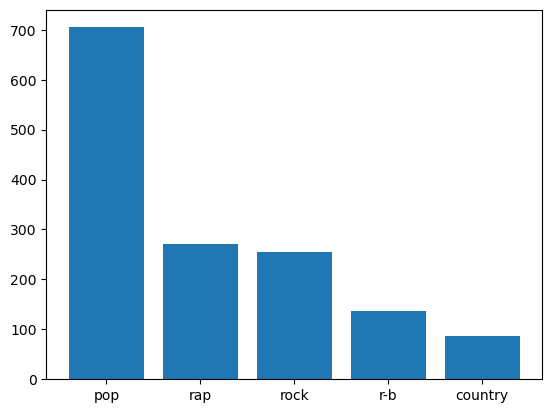

In [60]:
distribution = label.value_counts().to_dict()

x = distribution.keys()
y = distribution.values()

plt.bar(x,y)

# Classifier Definition

In [61]:
rfc_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

## Pure fit

In [62]:
# Pure fit
rfc_model = rfc_model.fit(X_train, y_train)
prediction = rfc_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.5876288659793815


In [63]:
# Pure fit
dt_model = dt_model.fit(X_train, y_train)
prediction = dt_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.49828178694158076


In [64]:
# Pure fit
svm_model = svm_model.fit(X_train, y_train)
prediction = svm_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.5979381443298969


## Param-Grid Design

In [80]:
rfc_param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# With Pure Data

## Grid Search CV

In [81]:
rfc_f = GridSearchCV(rfc_model, rfc_param_grid, verbose=2)
dt_f = GridSearchCV(dt_model, dt_param_grid, verbose=2)
svm_f = GridSearchCV(svm_model, svm_param_grid, verbose=2)

## Fit DATA

### Random Forest Classifier

In [11]:
rfc_f.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   2.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tot

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

In [16]:
best_rfc = rfc_f.best_estimator_
best_rfc

In [18]:
rfc_f.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

### Desicion Tree Classifier

In [19]:
dt_f.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [21]:
best_dt = dt_f.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)

In [22]:
dt_f.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

### Sypport Vector Machine Classifier

In [23]:
svm_f.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [24]:
best_svm = svm_f.best_estimator_
best_svm

SVC(C=1, kernel='poly')

In [25]:
svm_f.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}

## Best Model

In [11]:
best_rfc = RandomForestClassifier(bootstrap=True, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
best_dt = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=2, min_samples_split=10)
best_svm = SVC(C=1, gamma='scale', kernel='poly')

## Train lại sử dụng Best Model

In [12]:
best_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20)

In [13]:
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)

In [14]:
best_svm.fit(X_train, y_train)

SVC(C=1, kernel='poly')

### Accuracy

In [15]:
rfc_prediction = best_rfc.predict(X_test)
print(classification_report(y_test, rfc_prediction))

              precision    recall  f1-score   support

     country       1.00      0.17      0.29        12
         pop       0.60      0.80      0.69       148
         r-b       1.00      0.04      0.08        23
         rap       0.62      0.48      0.55        62
        rock       0.55      0.50      0.52        46

    accuracy                           0.60       291
   macro avg       0.75      0.40      0.43       291
weighted avg       0.65      0.60      0.57       291



In [16]:
dt_prediction = best_dt.predict(X_test)
print(classification_report(y_test, dt_prediction))

              precision    recall  f1-score   support

     country       0.50      0.08      0.14        12
         pop       0.60      0.68      0.64       148
         r-b       0.33      0.04      0.08        23
         rap       0.52      0.55      0.53        62
        rock       0.49      0.57      0.53        46

    accuracy                           0.56       291
   macro avg       0.49      0.38      0.38       291
weighted avg       0.54      0.56      0.53       291



In [17]:
svm_prediction = best_svm.predict(X_test)
print(classification_report(y_test, svm_prediction))

              precision    recall  f1-score   support

     country       0.00      0.00      0.00        12
         pop       0.60      0.90      0.72       148
         r-b       0.00      0.00      0.00        23
         rap       0.74      0.42      0.54        62
        rock       0.65      0.48      0.55        46

    accuracy                           0.62       291
   macro avg       0.40      0.36      0.36       291
weighted avg       0.57      0.62      0.57       291



## Model Improvement

### Feature Selection (For k from 3 to 10)

In [18]:
acc_best = 0
best_model = ''
for i in range(3,12):
    X_with_selectKBest = SelectKBest(chi2, k=i).fit_transform(data, label)
    X_train, X_test, y_train, y_test = train_test_split(X_with_selectKBest, label, test_size = 0.2, random_state = 18) 
    
    best_rfc = best_rfc.fit(X_train, y_train)
    predictions = best_rfc.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "rfc with k = {}, accuracy = {}".format(i, acc)

    best_dt = best_dt.fit(X_train, y_train)
    predictions = best_dt.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "dt with k = {}, accuracy = {}".format(i, acc)

    best_svm = best_svm.fit(X_train, y_train)
    predictions = best_svm.predict(X_test)
    acc = accuracy_score(y_test, predictions)

    if acc > acc_best:
        acc_best = acc
        best_model = "svm with k = {}, accuracy = {}".format(i, acc)

    print(best_model)

dt with k = 3, accuracy = 0.563573883161512
svm with k = 4, accuracy = 0.584192439862543
svm with k = 4, accuracy = 0.584192439862543
svm with k = 6, accuracy = 0.5910652920962199
svm with k = 7, accuracy = 0.6082474226804123
svm with k = 8, accuracy = 0.6151202749140894
svm with k = 8, accuracy = 0.6151202749140894
svm with k = 8, accuracy = 0.6151202749140894
svm with k = 11, accuracy = 0.6219931271477663


### MODEL Selection

### DROP Features

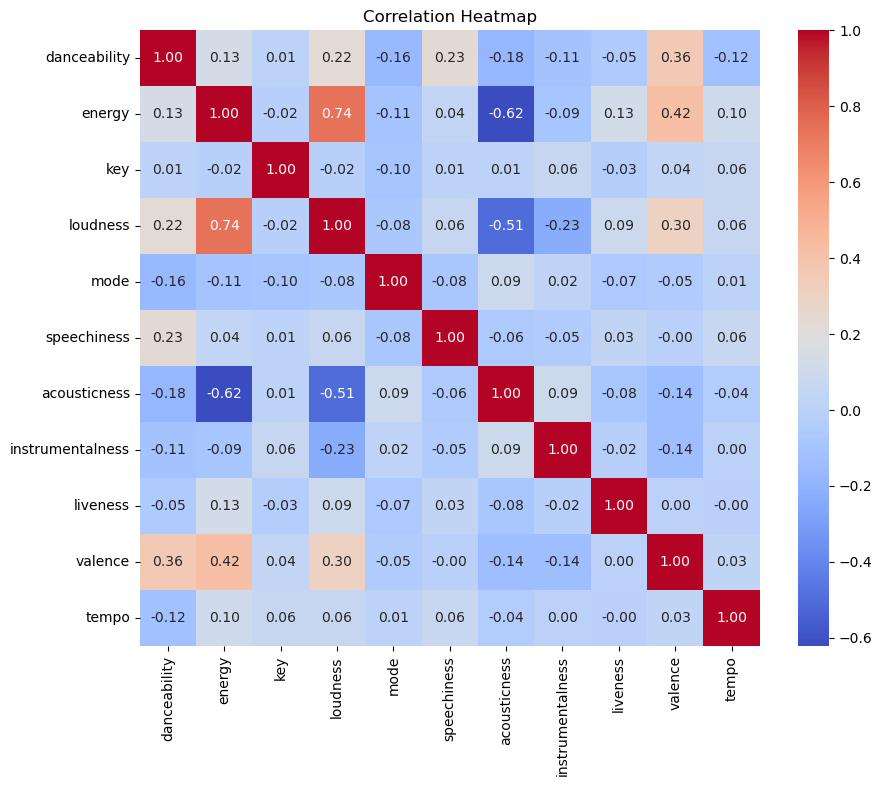

In [65]:
correlation_matrix = data.corr()

# Vẽ bản đồ nhiệt
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
#Drop all the feature with corr < 0.1
correlation_matrix = data.corr()

columns_to_drop = set() 
for i in correlation_matrix.columns[0:1]:
    for j in correlation_matrix.columns:
        if abs(correlation_matrix[i][j]) < 0.1 and i != j:  
            columns_to_drop.add(j)

data_filtered = data.drop(columns=columns_to_drop)

In [25]:
data_filtered

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,0.435897,0.387650,0.752007,0.0,0.021643,0.513646,0.000000,0.161432,0.181095
1,0.844933,0.736977,0.830893,0.0,0.063523,0.043168,0.000000,0.970234,0.552754
2,0.743590,0.559231,0.809416,0.0,0.190568,0.811930,0.122594,0.497064,0.348085
3,0.700855,0.631152,0.854860,0.0,0.080767,0.251764,0.000000,0.975366,0.788858
4,0.750916,0.348608,0.812649,0.0,0.303185,0.225474,0.000000,0.187092,0.299004
...,...,...,...,...,...,...,...,...,...
1448,0.416361,0.694853,0.778054,0.0,0.026395,0.213341,0.000007,0.415979,0.255869
1449,0.655678,0.796568,0.916952,1.0,0.039592,0.193118,0.000000,0.681816,0.317710
1450,0.954823,0.452379,0.661638,0.0,0.055253,0.017485,0.044174,0.900439,0.422953
1451,0.175824,0.641426,0.672934,1.0,0.011262,0.016474,0.222898,0.225069,0.192269


In [27]:
# With rfc
X_train, X_test, y_train, y_test = train_test_split(data_filtered, label, test_size = 0.2, random_state = 18)
best_rfc = best_rfc.fit(X_train,y_train)
prediction = best_rfc.predict(X_test)
print(accuracy_score(y_test, prediction))

0.6048109965635738


In [28]:
# With dt
X_train, X_test, y_train, y_test = train_test_split(data_filtered, label, test_size = 0.2, random_state = 18)
best_dt = best_dt.fit(X_train,y_train)
prediction = best_dt.predict(X_test)
print(accuracy_score(y_test, prediction))

0.5601374570446735


In [29]:
# With svm
X_train, X_test, y_train, y_test = train_test_split(data_filtered, label, test_size = 0.2, random_state = 18)
best_svm = best_svm.fit(X_train,y_train)
prediction = best_svm.predict(X_test)
print(accuracy_score(y_test, prediction))

0.6151202749140894


### Recursive Feature Elimination (RFE)

# Balance Data (Reduce Pop Data to 250)

In [32]:
label.value_counts()

tags
pop        705
rap        270
rock       255
r-b        137
country     86
Name: count, dtype: int64

In [67]:
df_normalized_sample_pop = df_normalized[df_normalized['tags'] == 'pop'].sample(250)
df_normalized_sample_not_pop = df_normalized[df_normalized['tags'] != 'pop']
df_normalized_sampled = pd.concat([df_normalized_sample_pop, df_normalized_sample_not_pop])
df_normalized_sampled.head(4)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,time_signature,popularity,song_name,artist_name,genius_id,lyric,tags,tier,genius_url,released_year
988,0.561661,0.569506,0.181818,0.809193,1.0,0.097660,0.008718,0.0,0.125670,0.759823,...,4,86,Single Soon,Selena Gomez,9031130,Should I do it on the phone? Should I leave a...,pop,D,https://genius.com/Selena-gomez-single-soon-ly...,2023.0
804,0.676435,0.556149,0.181818,0.748848,0.0,0.055428,0.149640,0.0,0.097692,0.244570,...,4,80,Grenade,Bruno Mars,58988,"Easy come, easy go That's just how you live, ...",pop,D,https://genius.com/Bruno-mars-grenade-lyrics,2010.0
953,0.492063,0.790404,0.727273,0.815584,0.0,0.017244,0.044280,0.0,0.111681,0.683869,...,4,80,Hurts Me,Tory Lanez,9266033,Do you not realize that it hurts me? When I s...,pop,D,https://genius.com/Tory-lanez-and-trippie-redd...,2023.0
995,0.426129,0.235590,0.636364,0.718787,1.0,0.020764,0.862486,0.0,0.089531,0.150142,...,4,81,logical,Olivia Rodrigo,9382806,"Master manipulator God, you're so good at wha...",pop,C,https://genius.com/Olivia-rodrigo-logical-lyrics,2023.0


In [68]:
df_normalized_sampled.tags.value_counts()

tags
rap        270
rock       255
pop        250
r-b        137
country     86
Name: count, dtype: int64

## Data Normalize

In [75]:
data = df_normalized_sampled.iloc[:,:-12]
label = df_normalized_sampled.tags

In [76]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
988,0.561661,0.569506,0.181818,0.809193,1.0,0.097660,0.008718,0.000000,0.125670,0.759823,0.348674
804,0.676435,0.556149,0.181818,0.748848,0.0,0.055428,0.149640,0.000000,0.097692,0.244570,0.382332
953,0.492063,0.790404,0.727273,0.815584,0.0,0.017244,0.044280,0.000000,0.111681,0.683869,0.627145
995,0.426129,0.235590,0.636364,0.718787,1.0,0.020764,0.862486,0.000000,0.089531,0.150142,0.200271
178,0.765568,0.658892,0.000000,0.826211,1.0,0.055077,0.077546,0.000000,0.077990,0.642813,0.379879
...,...,...,...,...,...,...,...,...,...,...,...
1439,0.000000,0.865406,0.363636,0.914053,0.0,0.064755,0.002025,0.196555,0.424108,0.356448,0.754488
1446,0.655678,0.616768,0.363636,0.825394,1.0,0.010558,0.095140,0.000013,0.077640,0.675658,0.448206
1447,0.588523,0.777047,0.545455,0.838659,1.0,0.020940,0.062986,0.000000,0.076125,0.479616,0.503667
1448,0.416361,0.694853,0.000000,0.778054,0.0,0.026395,0.213341,0.000007,0.351830,0.415979,0.255869


In [78]:
label.value_counts()

tags
rap        270
rock       255
pop        250
r-b        137
country     86
Name: count, dtype: int64

## Train Test Split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 18) 

## Pure fit

In [83]:
rfc_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()
svm_model = SVC()

In [84]:
# Pure fit
rfc_model = rfc_model.fit(X_train, y_train)
prediction = rfc_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.525


In [85]:
# Pure fit
dt_model = dt_model.fit(X_train, y_train)
prediction = dt_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.37


In [86]:
# Pure fit
svm_model = svm_model.fit(X_train, y_train)
prediction = svm_model.predict(X_test)
print(accuracy_score(y_test, prediction))

0.44


## GridSearchCV

### Random Forest

In [87]:
rfc_f.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; tot

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

In [88]:
best_rfc = rfc_f.best_estimator_
best_rfc

RandomForestClassifier(max_depth=20, n_estimators=300)

In [89]:
rfc_f.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

### Desicion Tree

In [95]:
dt_f.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)

In [96]:
best_dt = dt_f.best_estimator_
best_dt

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_estimator_'

In [93]:
dt_f.best_params_

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_params_'

### Support Vector Machine

In [97]:
svm_f.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scal

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [98]:
best_svm = svm_f.best_estimator_
best_svm

SVC(C=1, kernel='poly')

### Predict

In [99]:
# Pure fit
best_rfc = best_rfc.fit(X_train, y_train)
prediction = best_rfc.predict(X_test)
print(accuracy_score(y_test, prediction))

0.505


In [100]:
# Pure fit
best_dt = best_dt.fit(X_train, y_train)
prediction = best_dt.predict(X_test)
print(accuracy_score(y_test, prediction))

0.36


In [101]:
# Pure fit
best_svm = best_svm.fit(X_train, y_train)
prediction = best_svm.predict(X_test)
print(accuracy_score(y_test, prediction))

0.45
